In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## EDA

In [4]:
data.shape

(1338, 7)

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
 data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

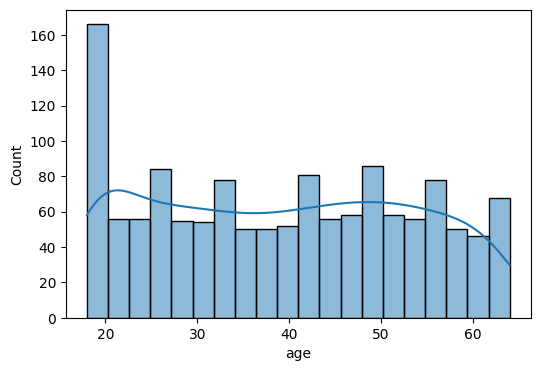

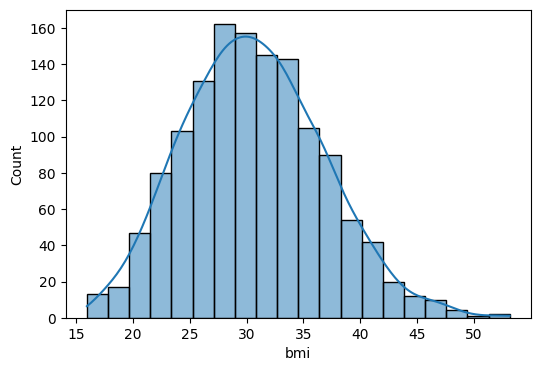

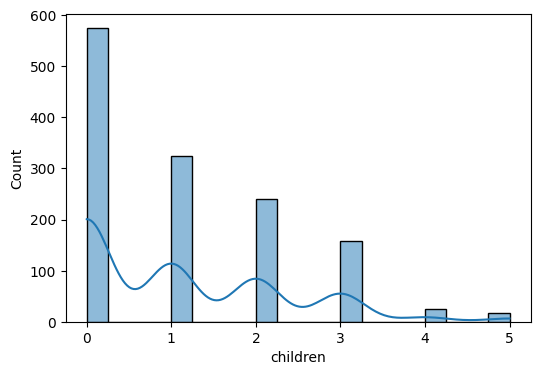

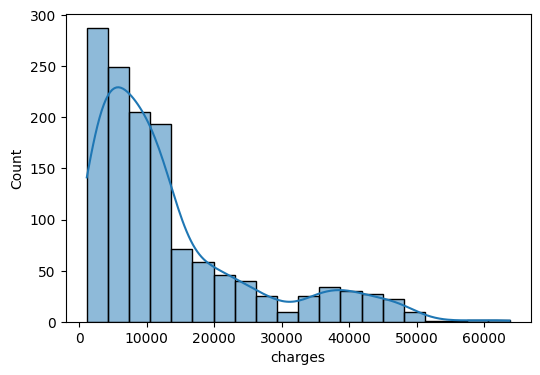

In [10]:
num_col = ['age', 'bmi', 'children', 'charges']
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde = True, bins = 20)

<Axes: xlabel='children', ylabel='count'>

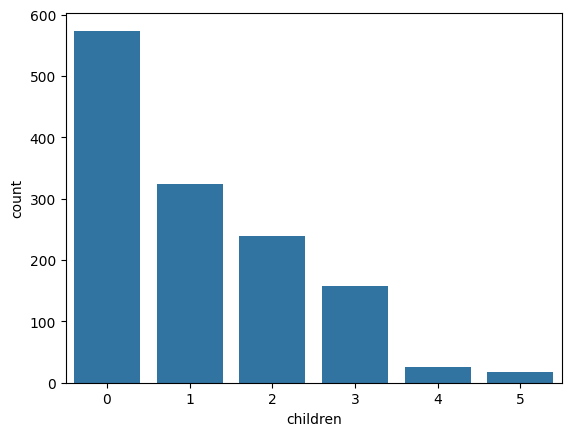

In [11]:
sns.countplot(x= data['children'])

<Axes: xlabel='sex', ylabel='count'>

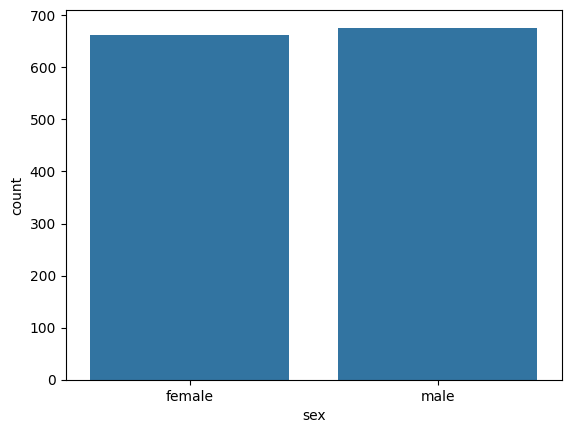

In [12]:
sns.countplot(x=data['sex'])

<Axes: xlabel='smoker', ylabel='count'>

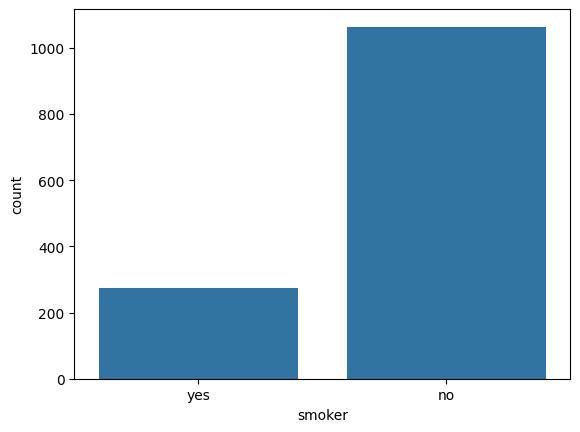

In [13]:
sns.countplot(x=data['smoker'])

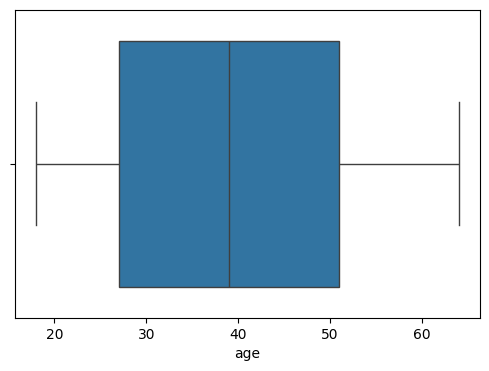

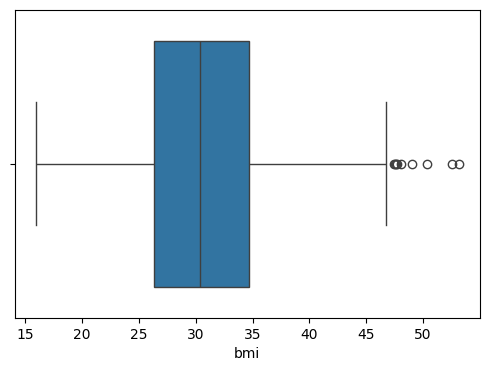

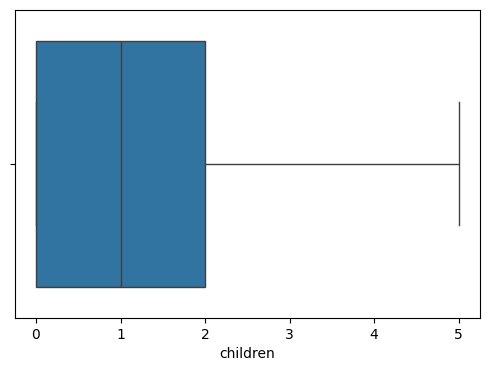

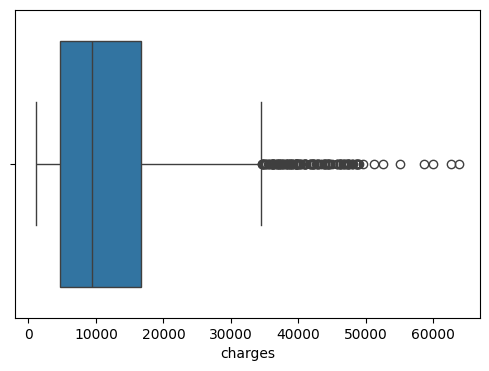

In [14]:
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])

### Correlation

<Axes: >

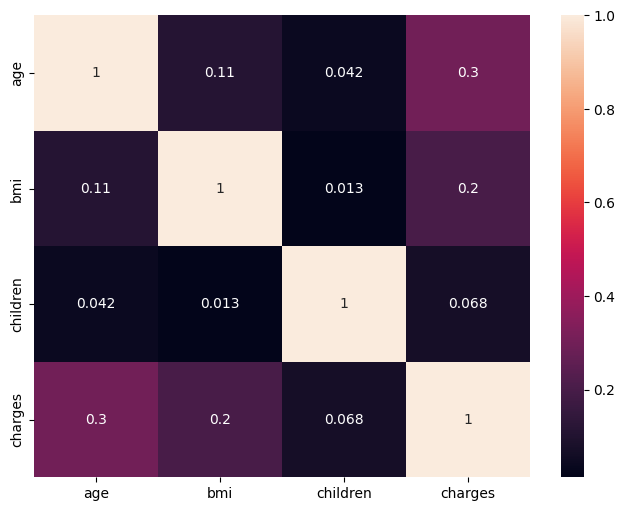

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True),annot=True)

### Data Cleaning and preprocessing

In [16]:
df_clean=data.copy()

In [17]:
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df_clean.drop_duplicates(inplace=True)

In [19]:
df_clean.shape

(1337, 7)

In [20]:
df_clean.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
df_clean.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [22]:
df_clean['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [23]:
df_clean['sex'] = df_clean['sex'].map({"male" :0, "female":1})

In [24]:
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [25]:
df_clean['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [26]:
df_clean['smoker'] = df_clean['smoker'].map({"no" :0, "yes":1})

In [27]:
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [28]:
df_clean.rename(columns={
    'sex': 'is_female',
    'smoke':'is_smoke'
}, inplace = True)

In [29]:
df_clean.head()

,age,is_female,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [30]:
df_clean['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [31]:
df_clean = pd.get_dummies(df_clean, columns = ['region'], drop_first=True)

In [32]:
df_clean.head()

,age,is_female,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [33]:
df_clean = df_clean.astype(int)

In [34]:
df_clean

,age,is_female,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


## Feature Engineering

<Axes: xlabel='bmi', ylabel='Count'>

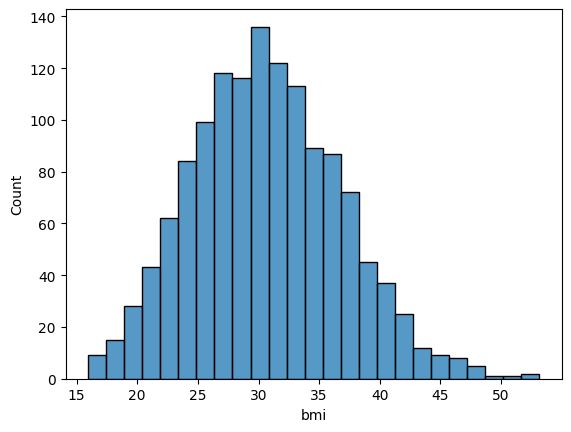

In [35]:
sns.histplot(data['bmi'])

In [36]:
df_clean['bmi_category']=pd.cut(
    df_clean['bmi'],
    bins=[0,18.5,24.9,29.9, float('inf')],
    labels=['Underweight', 'Normal','Overweight', 'Obese']
)

In [37]:
df_clean

,age,is_female,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,Obese
1334,18,1,31,0,0,2205,0,0,0,Obese
1335,18,1,36,0,0,1629,0,1,0,Obese
1336,21,1,25,0,0,2007,0,0,1,Overweight


In [38]:
df_clean=pd.get_dummies(df_clean, columns = ['bmi_category'], drop_first=True)

In [39]:
df_clean.astype(int)

,age,is_female,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,1,0


## Feature Scaling

In [40]:
df_clean.columns

Index(['age', 'is_female', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [41]:
from sklearn.preprocessing import StandardScaler
cols = ['age', 'bmi', 'children']
scaler = StandardScaler()

scale_data = scaler.fit_transform(df_clean[cols])

In [42]:
df_clean.head()

,age,is_female,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False


In [43]:
from scipy.stats import pearsonr

selected_features = [
    'age','bmi','children','is_female','smoker','region_northwest','region_southeast','region_southwest',
    'bmi_category_Normal','bmi_category_Overweight','bmi_category_Obese'
]

In [44]:
df_clean.head()

,age,is_female,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False


In [45]:
df_clean.columns

Index(['age', 'is_female', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
cols=['age','bmi', 'children']
scaler = StandardScaler()
df_clean[cols]=scaler.fit_transform(df_clean[cols])

In [50]:
df_clean.head()

,age,is_female,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,False,True,False
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,False,False,True
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,False,False,True
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,True,False,False
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,False,True,False


In [61]:
from scipy.stats import pearsonr

#person correlation calculation
#------------------------------

#list of features to check against target

selected_features = [
    'age','bmi','children','is_female','smoker','region_northwest','region_southeast','region_southwest',
    'bmi_category_Normal','bmi_category_Overweight','bmi_category_Obese'
]
correlations = {
    feature: pearsonr(df_clean[feature], df_clean['charges'])[0]
    for feature in selected_features
}

correlation_df = pd.DataFrame(
    list(correlations.items()),
    columns=['Feature', 'Pearson Correlation']
).sort_values(by='Pearson Correlation', ascending=False).reset_index(drop=True)
print(correlation_df)

                    Feature  Pearson Correlation
0                    smoker             0.787234
1                       age             0.298309
2        bmi_category_Obese             0.200348
3                       bmi             0.196236
4          region_southeast             0.073577
5                  children             0.067390
6          region_northwest            -0.038695
7          region_southwest            -0.043637
8                 is_female            -0.058046
9       bmi_category_Normal            -0.104042
10  bmi_category_Overweight            -0.120601


In [62]:
cat_features=[
    'is_female','smoker','region_northwest','region_southeast','region_southwest',
    'bmi_category_Normal','bmi_category_Overweight','bmi_category_Obese'
]

In [70]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha=0.05
df_clean['charges_bin']=pd.qcut(df_clean['charges'], q=4, labels=False)
chi2_results={}
for col in cat_features:
    contingency = pd.crosstab(df_clean[col], df_clean['charges_bin'])
    chi2_stat, p_val, _, _= chi2_contingency(contingency)
    decision = 'Reject Null (Keep Features)' if p_val<alpha else 'Accept Null (Drop Feature)'
    chi2_results[col]={
        'chi2_statistic': chi2_stat,
        'p_value':p_val,
        'Decision':decision
    }
    chi2_df=pd.DataFrame(chi2_results).T
    chi2_df=chi2_df.sort_values(by = 'p_value')
    chi2_df

In [71]:
chi2_df.head()

,chi2_statistic,p_value,Decision
smoker,848.219178,0.0,Reject Null (Keep Features)
region_southeast,15.998167,0.001135,Reject Null (Keep Features)
is_female,10.258784,0.01649,Reject Null (Keep Features)
bmi_category_Obese,8.515711,0.036473,Reject Null (Keep Features)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)


In [72]:
final_df = df_clean[['age','is_female','bmi','children','smoker','charges','region_southeast','bmi_category_Obese']]

In [73]:
final_df

,age,is_female,bmi,children,smoker,charges,region_southeast,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,False
1,-1.511647,0,0.462463,-0.079442,0,1725,1,True
2,-0.799350,0,0.462463,1.580143,0,4449,1,True
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,False
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,False
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,True
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,True
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,True
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,False
